In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
driver = webdriver.Chrome()

In [11]:
driver.get('https://skillfactory.ru/courses/programmirovanie')
cards = WebDriverWait(driver,10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, "card"))
)   

In [12]:
courses = []
prices = []
for card in cards:
    try:
        name = card.find_element(By.CLASS_NAME, 'title__link')
        price = card.find_element(By.CLASS_NAME, 'card__current-price')
        
        prices.append(int(price.text.replace(" ₽/мес", ""))) #Если бесплатно или стоимость не в месяц, то здесь выдаст ошибку и данные просто не добавятся
        courses.append(name.text)
    except:
        pass


In [13]:
driver.quit()

In [14]:
df = pd.DataFrame({'Course':courses,  'Price (monthly)': prices})

In [15]:
df

,Course,Price (monthly)
0,IT-специалист с нуля,4198
1,Python-разработчик,4027
2,Python-разработчик PRO,4941
3,Fullstack-разработчик на Python,4586
4,1С-программист,3235
5,Системный администратор,3329
6,C++ разработчик,3413
7,DevOps-инженер,3136
8,Frontend-разработчик,2650
9,Frontend-разработчик PRO,3982


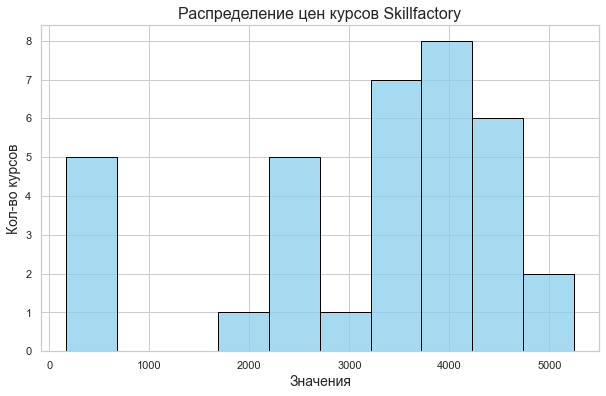

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
prices = df['Price (monthly)'].to_numpy()

sns.set(style="whitegrid")

# Создание гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
sns.histplot(prices, color='skyblue', bins=10, edgecolor='black')

# Добавление заголовка и подписей осей
plt.title('Распределение цен курсов Skillfactory', fontsize=16)
plt.xlabel('Значения', fontsize=14)
plt.ylabel('Кол-во курсов', fontsize=14)
plt.savefig('SkillfactoryPrices.png')
# Отображение графика
plt.show()

In [ ]:
df_sorted = df.sort_values(by='Price (monthly)', ascending=False)
df_sorted = df_sorted.head()

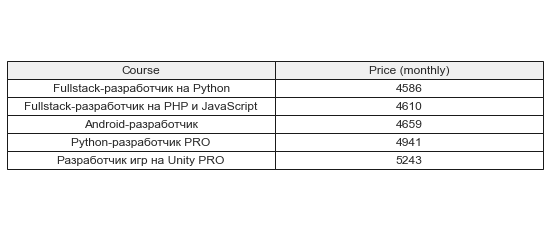

In [20]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
# Создаем таблицу с помощью seaborn
table = plt.table(cellText=df_sorted.values,
                  colLabels=df_sorted.columns,
                  loc='center',
                  cellLoc='center',
                  colColours=['#f0f0f0']*len(df.columns))  # цвет заголовков

# Настраиваем внешний вид таблицы
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)  # масштабируем таблицу (ширина, высота ячеек)

# Убираем оси
plt.axis('off')
plt.savefig('SkillfactoryCourses.png')
# Показываем таблицу
plt.show()